In [1]:
import pickle
import numpy as np

from utils.eval_util import *
from utils.data_util import *

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
tag = 'fashion_mnist'
dataname = 'fashion_mnist_0' # We show the T-shirt case in Fashion-Mnist as demo
model_type = 'ae'

In [3]:
with open('./saved_error/{}_all/{}/{}_0.pkl'.format(tag, dataname, model_type), 'rb') as f:
    res = pickle.load(f)

    train_pred = res['train_pred']
    test_pred = res['test_pred']
    test_y = res['test_y']
    train_x = res['train_x']
    test_x = res['test_x']

    train_hard = get_hardness(train_x).squeeze(1)
    test_hard = get_hardness(test_x).squeeze(1)


    if 'test_err' in res:
        test_error = res['test_err']
        train_error = res['train_err']
    else:
        train_error = (np.abs(train_pred - train_x)).mean((1,2,3))
        test_error = (np.abs(test_pred - test_x)).mean((1,2,3))

    res, scores = get_eval_res(train_hard, test_hard, train_error, test_error, test_y)
    res_wo_prior, scores_wo_prior = get_eval_res_wo_prior(train_hard, test_hard, train_error, test_error, test_y)

## Visualize samples with high/low hardness values

In [4]:
sample_num = 10
high_hardness_index = np.argsort(test_hard)[-sample_num:]
low_hardness_index = np.argsort(test_hard)[:sample_num]

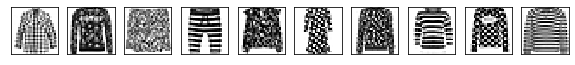

In [5]:

plt.figure(figsize=(sample_num, 2))
for i in range(0, sample_num):
    plt.subplot(1, sample_num, i+1)
    plt.imshow(test_x[high_hardness_index[i]], interpolation='nearest', cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

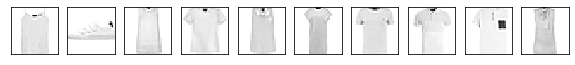

In [6]:
plt.figure(figsize=(sample_num, 2))

for i in range(0, sample_num):
    plt.subplot(1, sample_num, i+1)
    plt.imshow(test_x[low_hardness_index[i]], interpolation='nearest', cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

## Some result output

In [7]:
corr = get_correlation(train_hard, train_error)

In [8]:
print(dataname, model_type)
print('correlation (Pearson): ', corr[0])

print('result:')
print('(Base) AUROC:', res['base']['auroc'])
print('(After) AUROC', res['out']['auroc'])

fashion_mnist_0 ae
correlation (Pearson):  0.8074494580985672
result:
(Base) AUROC: 0.8914836666666667
(After) AUROC 0.9174514444444446


In [9]:
# visualize the correlation between hardness and error scores

font = {'size'   : 12}

mpl.rc('font', **font)

correct_color = '#5B9BD5'
false_color = '#ED7D31'

def plot_points(x, y, y_test, title, err_sample_num=800, save_fig_path=None):
    plt.figure(figsize=(3.5, 2.6))

    # just sample part of incorrect data for better visualization
    ab_x = x[y_test == 1][:err_sample_num]
    ab_y = y[y_test == 1][:err_sample_num]

    plt.plot(ab_x, ab_y, linestyle='None', label='abnormal', markerfacecolor = false_color, markeredgecolor = false_color,  marker = '.')
    plt.plot(x[y_test == 0], y[y_test == 0], label='normal', linestyle='None', markerfacecolor = correct_color, markeredgecolor = correct_color, marker = '.')
  
    plt.xlabel('hardness', fontsize=10)
    plt.ylabel('reconstruction error', fontsize=10)
    plt.legend()



## Before

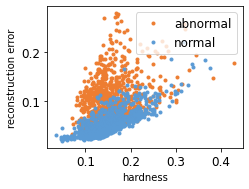

In [10]:
plot_points(test_hard, test_error, test_y, '')

## After

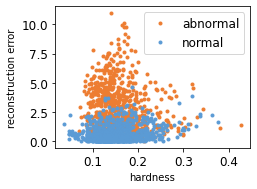

In [11]:
plot_points(test_hard, scores['out'], test_y, '')